Autor: Felipe Colombelli
```
```
Github: @colombelli

In [0]:
# Importando o TensorFlow e carregando o dataset

import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


**Entendendo os dados...**

In [0]:
# Investigação das dimensões e tipo dos dados

print(type(x_train))
print(x_train.shape)

print(type(y_test))
print(y_train.shape)

print(type(x_test))
print(x_test.shape)

print(type(y_test))
print(y_test.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
<class 'numpy.ndarray'>
(60000,)
<class 'numpy.ndarray'>
(10000, 28, 28)
<class 'numpy.ndarray'>
(10000,)


In [0]:
# Investigação de uma amostra específica dos dados

print(x_train[0])
print("\n\n~~~~~~~\n\n")
print(y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

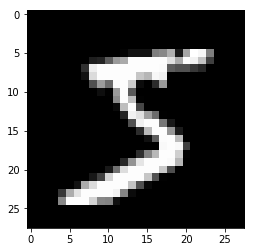

In [0]:
# Visualizando uma imagem qualquer do dataset

import matplotlib.pyplot as plt
plt.imshow(x_train[0], 'gray')

**Processamento dos dados**

In [0]:
# Normalização dos dados

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [0]:
# Transformação das labels em One Hot Encoding 

y_train = tf.keras.utils.to_categorical(y_train, 10)     
y_test = tf.keras.utils.to_categorical(y_test, 10)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
# Modelo básico

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())  
model.add(tf.keras.layers.Dense(16, activation=tf.nn.sigmoid, 
                                input_dim=784))  
model.add(tf.keras.layers.Dense(16, activation=tf.nn.sigmoid))  
model.add(tf.keras.layers.Dense(10, activation=tf.nn.sigmoid))  

opt = tf.keras.optimizers.SGD(lr=0.1)
model.compile(loss='mean_squared_error',
             metrics=['accuracy'], optimizer=opt)  



In [0]:
# Treino
model.fit(x_train, y_train, epochs=3, batch_size=5)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 13s 224us/sample - loss: 0.0913 - acc: 0.1232
Epoch 2/3
60000/60000 [==============================] - 14s 230us/sample - loss: 0.0891 - acc: 0.1905
Epoch 3/3
60000/60000 [==============================] - 13s 224us/sample - loss: 0.0870 - acc: 0.3196


It is a 4


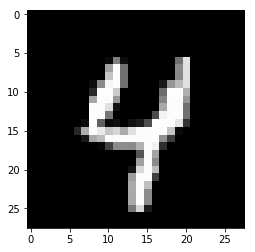

In [0]:
# Utilizando o modelo

whatIsIt = x_test[1111]
itIsA = y_test[1111]

print("É um", itIsA)
plt.imshow(whatIsIt, 'gray')

In [0]:
predictions = model.predict_classes([x_test])
print("O palpite do modelo é que seja um", predictions[1111])

The model says it is a 4


In [0]:
# Loss e accuracy nos dados de teste

val_loss, val_acc = model.evaluate(x_test, y_test)
print("\nLoss: ", val_loss, "\nAccuracy: ", val_acc)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.0837 - acc: 0.3787

Loss:  0.08373988853693008 
Accuracy:  0.3787


In [0]:
# Modelo básico + Softmax na última camada

model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Flatten())  
model2.add(tf.keras.layers.Dense(16, activation=tf.nn.sigmoid))  
model2.add(tf.keras.layers.Dense(16, activation=tf.nn.sigmoid))  
model2.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) 

opt2 = tf.keras.optimizers.SGD(lr=0.1)
model2.compile(loss='mean_squared_error',
             metrics=['accuracy'], optimizer=opt2)  

model2.fit(x_train, y_train, epochs=5, batch_size=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 14s 237us/sample - loss: 0.0900 - acc: 0.1173
Epoch 2/5
60000/60000 [==============================] - 14s 236us/sample - loss: 0.0890 - acc: 0.1655
Epoch 3/5
60000/60000 [==============================] - 14s 236us/sample - loss: 0.0854 - acc: 0.2387
Epoch 4/5
60000/60000 [==============================] - 14s 236us/sample - loss: 0.0761 - acc: 0.3133
Epoch 5/5
60000/60000 [==============================] - 14s 237us/sample - loss: 0.0665 - acc: 0.4541


In [0]:
val_loss, val_acc = model2.evaluate(x_test, y_test)
print("\nLoss: ", val_loss, "\nAccuracy: ", val_acc)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.0615 - acc: 0.5366

Loss:  0.06153186094164848 
Accuracy:  0.5366


In [0]:
# Softmax com Cross Entropy

model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Flatten())  
model2.add(tf.keras.layers.Dense(16, activation=tf.nn.sigmoid))   
model2.add(tf.keras.layers.Dense(16, activation=tf.nn.sigmoid)) 
model2.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) 

opt2 = tf.keras.optimizers.SGD(lr=0.1)
model2.compile(loss='categorical_crossentropy',
             metrics=['accuracy'], optimizer=opt2)  

model2.fit(x_train, y_train, epochs=5, batch_size=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 14s 232us/sample - loss: 0.6677 - acc: 0.7930
Epoch 2/5
60000/60000 [==============================] - 14s 233us/sample - loss: 0.2442 - acc: 0.9292
Epoch 3/5
60000/60000 [==============================] - 14s 234us/sample - loss: 0.1957 - acc: 0.9426
Epoch 4/5
60000/60000 [==============================] - 14s 235us/sample - loss: 0.1726 - acc: 0.9499
Epoch 5/5
60000/60000 [==============================] - 14s 235us/sample - loss: 0.1598 - acc: 0.9528


In [0]:
val_loss, val_acc = model2.evaluate(x_test, y_test)
print("\nLoss: ", val_loss, "\nAccuracy: ", val_acc)

10000/10000 [==============================] - 0s 40us/sample - loss: 0.1727 - acc: 0.9505

Loss:  0.17265489064007997 
Accuracy:  0.9505


## Analisando a diferença entre uma sigmoidal e a Softmax

A sigmoide, a partir de um certo valor, muda pouca coisa mesmo para números distantes,
por exemplo, 5 e 10 (dobro de 5). Já a softmax considera as dimensões entre os números
e seu output são probabilidades que, somadas, resultam em 1.

In [0]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

print(sigmoid(5), sigmoid(10))

0.9933071490757153 0.9999546021312976


In [0]:
import numpy as np


def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) 
  
softmax([5, 10])

array([0.00669285, 0.99330715])